# Import software libraries and load the dataset

In [4]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))

# Load the dataset.
stores_df = pd.read_csv('../data/stores_data_full_clean.csv',
                        index_col = 0)
stores_df['Date'] = pd.to_datetime(stores_df['Date'])
print('\nLoaded dataset.')

# Format floats with comma in thousands place
pd.options.display.float_format = '{:,.2f}'.format

Libraries used in this project:
- Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.22.3
- pandas 1.4.3
- Matplotlib 3.5.1

Loaded dataset.


# Generate stack plots to compare total items sold for each day in January and February

In [19]:
jan = stores_df[stores_df['Date'].dt.month == 1]
feb = stores_df[stores_df['Date'].dt.month == 2]

jan_quant = stores_df.groupby(jan['Date'].dt.day)['Quantity'].sum()
feb_quant = stores_df.groupby(feb['Date'].dt.day)['Quantity'].sum()
feb_quant = feb_quant.append(pd.Series([np.nan, np.nan, np.nan]),
                            ignore_index = True)

# jan_quant.head()
feb_quant.tail()

C:\Users\NBevan\AppData\Local\Temp/ipykernel_27812/1693518067.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feb_quant = feb_quant.append(pd.Series([np.nan, np.nan, np.nan]),


26   91.00
27   30.00
28     NaN
29     NaN
30     NaN
dtype: float64

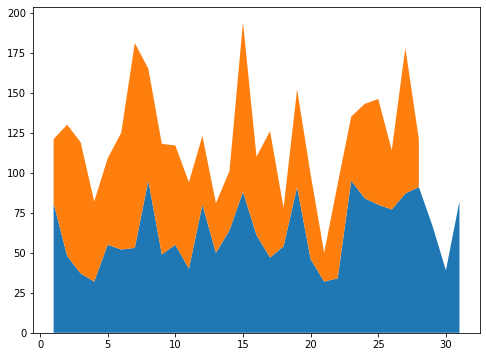

In [9]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.stackplot(jan_quant.index, jan_quant, feb_quant)

# Generate scatter plots to see how different variables correlate with gross income

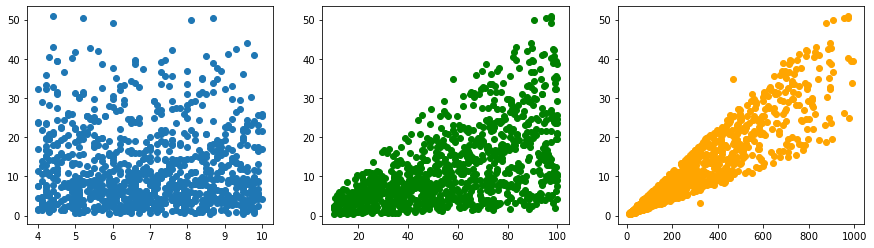

In [10]:
y = stores_df['GrossIncome']
fig, ax = plt.subplots(1, 3, figsize = (15, 4))
ax[0].scatter(stores_df['CustomerRating'], y)
ax[1].scatter(stores_df['UnitPrice'], y, c = 'green')
ax[2].scatter(stores_df['Revenue'], y, c = 'orange')

# Generate bar charts comparing branch revenue per product line

In [11]:
prod_rev = stores_df.groupby(['ProductLine', 'Branch'])['Revenue'].sum()
prod_rev

ProductLine         Branch      
Clothing            Carbon Creek   15,554.77
                    Greene City    15,631.73
                    Olinger        20,092.04
Electronics         Carbon Creek   17,444.87
                    Greene City    16,239.47
                    Olinger        18,065.69
Food and beverages  Carbon Creek   16,345.81
                    Greene City    14,490.37
                    Olinger        22,016.52
Health and beauty   Carbon Creek   11,997.86
                    Greene City    18,567.26
                    Olinger        15,793.38
Home and lifestyle  Carbon Creek   20,626.21
                    Greene City    16,713.49
                    Olinger        13,233.86
Sports and travel   Carbon Creek   18,450.19
                    Greene City    19,036.38
                    Olinger        15,011.36
Name: Revenue, dtype: float64

0 0 Clothing
1 1 Electronics
2 2 Food and beverages
3 0 Health and beauty
4 1 Home and lifestyle
5 2 Sports and travel


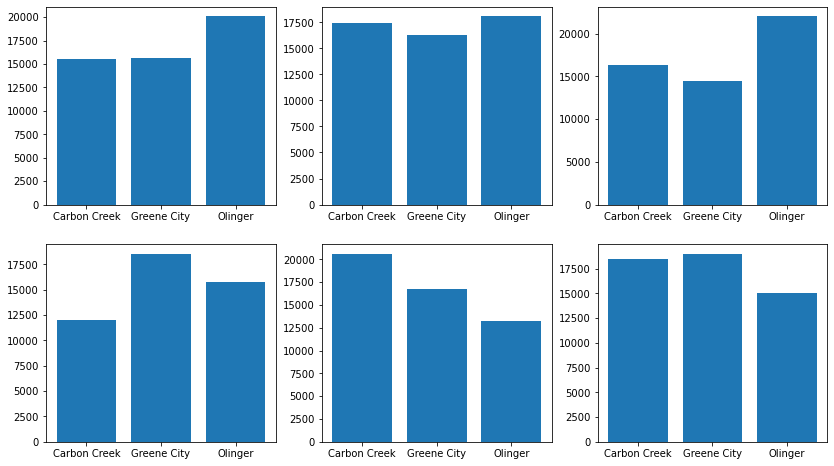

In [14]:
# Define lists of product lines and branches to iterate over.
prods = prod_rev.index.get_level_values('ProductLine').unique()
branch = prod_rev.index.get_level_values('Branch').unique()
i = 0

fig, ax = plt.subplots(2, 3, figsize = (14, 8))

for col in range(0, 3):
    ax[0, col].bar(branch, prod_rev.loc[[prods[i]]])
    print(i, col, prods[i])
    i += 1
    
for col in range(0, 3):
    ax[1, col].bar(branch, prod_rev.loc[[prods[i]]])
    print(i, col, prods[i])
    i += 1

# Generate histograms and box plots that show the distributions of revenue and income

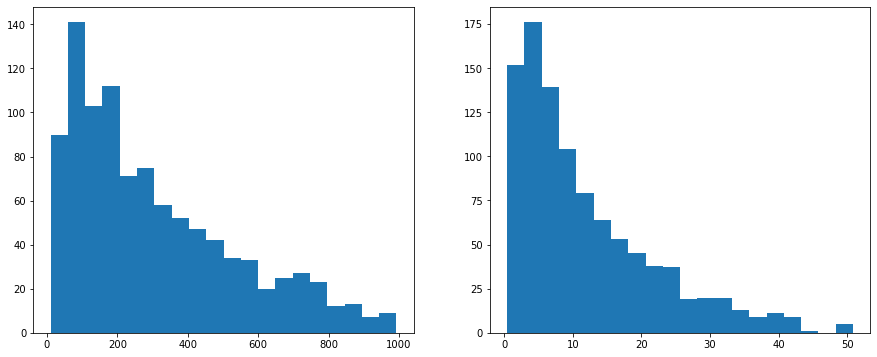

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
ax[0].hist(stores_df['Revenue'], bins = 20)
ax[1].hist(stores_df['GrossIncome'], bins = 20);

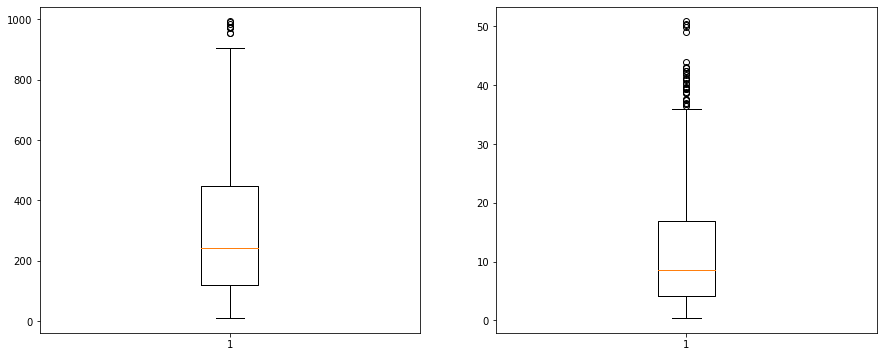

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
ax[0].boxplot(stores_df['Revenue'])
ax[1].boxplot(stores_df['GrossIncome']);

# Generate violin plots that compare the distributions of unit price and tax price

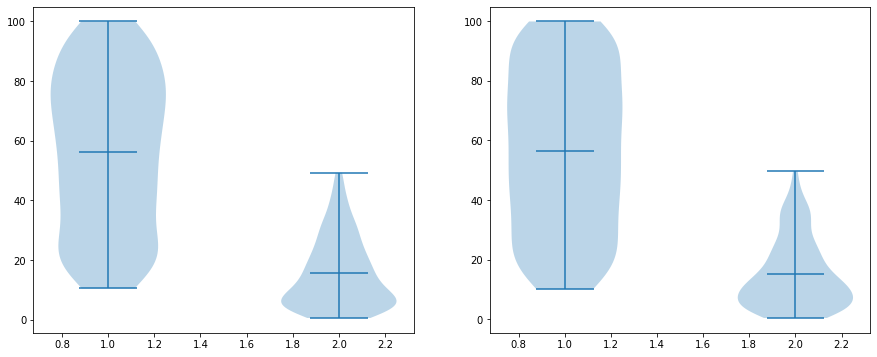

In [20]:
# Define lists of prices for each month.
jan_unit_tax = [jan['UnitPrice'].values, jan['TaxPrice'].values]
feb_unit_tax = [feb['UnitPrice'].values, feb['TaxPrice'].values]

fig, ax = plt.subplots(1, 2, figsize = (15, 6))
ax[0].violinplot(jan_unit_tax, showmeans = True)
ax[1].violinplot(feb_unit_tax, showmeans = True);

# Generate a `GridSpec` of multiple plots showing the distributions of revenue and income

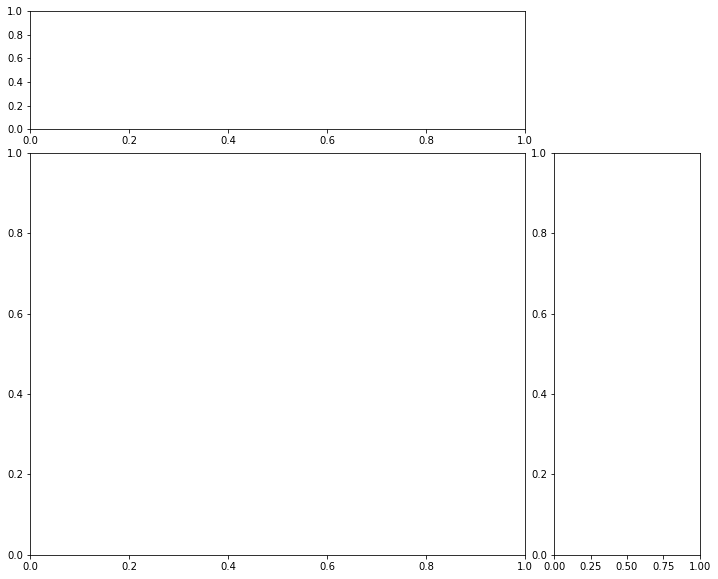

In [22]:
# Set up grid first.
fig = plt.figure(figsize = (12, 10))
grid = fig.add_gridspec(4, 4)

ax_top = fig.add_subplot(grid[0, :3])
ax_right = fig.add_subplot(grid[1:4, 3])
ax_mid = fig.add_subplot(grid[1:4, :3])

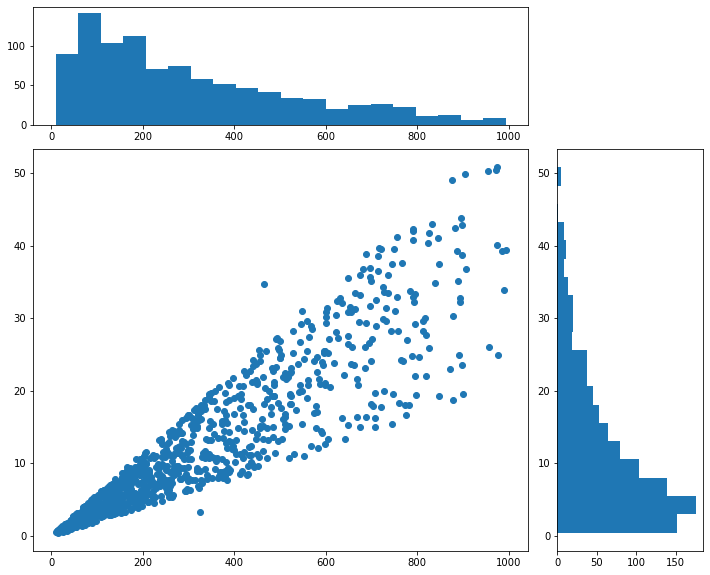

In [23]:
ax_top.hist(stores_df['Revenue'], bins = 20)
ax_right.hist(stores_df['GrossIncome'],
              bins = 20, orientation = 'horizontal')
ax_mid.scatter(stores_df['Revenue'], stores_df['GrossIncome'])
fig

# Generate a 3-D scatter plot comparing revenue, gross income, and customer rating

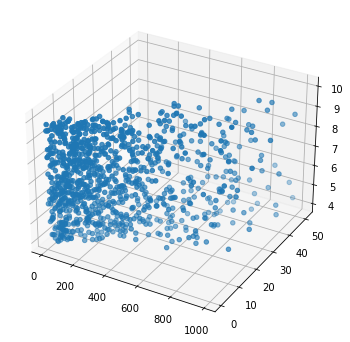

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(projection = '3d')
ax.scatter(stores_df['Revenue'],
           stores_df['GrossIncome'],
           stores_df['CustomerRating']);

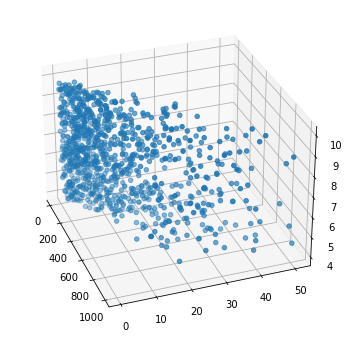

In [25]:
ax.view_init(azim = -20)
fig